## Solving system of ODEs using Runge–Kutta–Fehlberg RKF Method

This algorithm has no definite step-size rather step-size is adaptative (& calculated internally). This algo is heavily modified to <b>remove the dependancy of numpy arrays</b> because numpy isn't available on my HP Prime calculator MicroPython. <br/>Running time comparisons discussed here https://www.hpmuseum.org/forum/thread-19061.html
<br/> <img src="https://m.media-amazon.com/images/I/71YJh0vg5aL._AC_SX355_.jpg" width=150>

In [1]:
from math import *
import time
import matplotlib.pyplot as plt

**Main Algorithm**

In [2]:
'''
rkf(f,a,b,x0,atol,rtol,hmax,hmin) -> [list(),list(list())]

 
  RK4 for local error estimation:
        y4_i+1 = y4_i + c1*k1 + c3*k3 + c4*k4 + c5*k5

  Evaluations:
        k1 = h * f( x, y )
        k2 = h * f( x + a2 * h , y + b21 * k1)
        k3 = h * f( x + a3 * h , y + b31 * k1 + b32 * k2)
        k4 = h * f( x + a4 * h , y + b41 * k1 + b42 * k2 + b43 * k3 )
        k5 = h * f( x + a5 * h , y + b51 * k1 + b52 * k2 + b53 * k3 + b54 * k4 )
        k6 = h * f( x + a6 * h , y + b61 * k1 + b62 * k2 + b63 * k3 + b64 * k4 + b65 * k5 )


  Params
  ----------
      f        -> (functions) to be solved must return list of dimension equalling x0
      a        -> (float) initial interval value
      b        -> (float) end interval value
      x0       -> (list)  initial value of n variables 
      atol     -> (float) absolute tolerance for truncation error
      rtol     -> (float) relative tolerance for truncation error
      hmax     -> (float) max step size
      hmin     -> (float) min step size
      show_info -> (string) execution times
      
  Return
  -------
      T     -> (list) independent variable
      X     -> (nested list) solution of n variables
      

OPTIONAL Graphing is provided for sequential differentials y , y', y'' .....
     
'''
print()

In [3]:
class rkf():

    def __init__(self,f, a, b, x0, atol=1e-8, rtol=1e-6, hmax=1e-1, hmin=1e-40,show_info=True):
        self.f=f
        self.a=a
        self.b=b
        self.x0=x0
        self.atol=atol
        self.rtol=rtol
        self.hmax=hmax
        self.hmin=hmin
        self.show_info=show_info

    def solve(self):

        a2  =   2.500000000000000e-01  #  1/4
        a3  =   3.750000000000000e-01  #  3/8
        a4  =   9.230769230769231e-01  #  12/13
        a5  =   1.000000000000000e+00  #  1
        a6  =   5.000000000000000e-01  #  1/2

        b21 =   2.500000000000000e-01  #  1/4
        b31 =   9.375000000000000e-02  #  3/32
        b32 =   2.812500000000000e-01  #  9/32
        b41 =   8.793809740555303e-01  #  1932/2197
        b42 =  -3.277196176604461e+00  # -7200/2197
        b43 =   3.320892125625853e+00  #  7296/2197
        b51 =   2.032407407407407e+00  #  439/216
        b52 =  -8.000000000000000e+00  # -8
        b53 =   7.173489278752436e+00  #  3680/513
        b54 =  -2.058966861598441e-01  # -845/4104
        b61 =  -2.962962962962963e-01  # -8/27
        b62 =   2.000000000000000e+00  #  2
        b63 =  -1.381676413255361e+00  # -3544/2565
        b64 =   4.529727095516569e-01  #  1859/4104
        b65 =  -2.750000000000000e-01  # -11/40

        r1  =   2.777777777777778e-03  #  1/360
        r3  =  -2.994152046783626e-02  # -128/4275
        r4  =  -2.919989367357789e-02  # -2197/75240
        r5  =   2.000000000000000e-02  #  1/50
        r6  =   3.636363636363636e-02  #  2/55

        c1  =   1.157407407407407e-01  #  25/216
        c3  =   5.489278752436647e-01  #  1408/2565
        c4  =   5.353313840155945e-01  #  2197/4104
        c5  =  -2.000000000000000e-01  # -1/5
        
        start_time = time.time()
        
        t = self.a
        x = self.x0
        h = self.hmax

        T = [t]
        X = [x]
        
        while t < self.b:

            if t + h > self.b:
                h = self.b - t

           # k1 = h * self.f(t, x)
            k1 = list(map(lambda i:h*i, self.f(t, x)))
           # k2 = h * self.f(t + a2 * h, x + b21 * k1 )
            k2 = list(map(lambda i:h*i, self.f(t + a2 * h, [sum(i) for i in zip(x, [b21*i for i in k1] )] )))
           # k3 = h * self.f(t + a3 * h, x + b31 * k1 + b32 * k2)
            k3 = list(map(lambda i:h*i, self.f(t + a3 * h, [sum(i) for i in zip(x, [b31*i for i in k1], [b32*i for i in k2] )] )))
           # k4 = h * self.f(t + a4 * h, x + b41 * k1 + b42 * k2 + b43 * k3)
            k4 = list(map(lambda i:h*i, self.f(t + a4 * h, [sum(i) for i in zip(x, [b41*i for i in k1], [b42*i for i in k2], [b43*i for i in k3] )] )))
           # k5 = h * self.f(t + a5 * h, x + b51 * k1 + b52 * k2 + b53 * k3 + b54 * k4)
            k5 = list(map(lambda i:h*i, self.f(t + a5 * h, [sum(i) for i in zip(x, [b51*i for i in k1], [b52*i for i in k2], [b53*i for i in k3], [b54*i for i in k4]  )] )))
           # k6 = h * self.f(t + a6 * h, x + b61 * k1 + b62 * k2 + b63 * k3 + b64 * k4 + b65 * k5)
            k6 = list(map(lambda i:h*i, self.f(t + a6 * h, [sum(i) for i in zip(x, [b61*i for i in k1], [b62*i for i in k2], [b63*i for i in k3], [b64*i for i in k4], [b65*i for i in k5]  )] )))

           # r = abs( r1 * k1 + r3 * k3 + r4 * k4 + r5 * k5 + r6 * k6 ) / h
            r = list(map(lambda i:abs(i)/h, [sum(i) for i in zip([r1*i for i in k1], [r3*i for i in k3], [r4*i for i in k4], [r5*i for i in k5], [r6*i for i in k6] )] ))
           # r = r / (self.atol+self.rtol*(abs(x)+abs(k1)))
            r = [ (r[i] / ( self.atol+self.rtol*( abs(x[i]) + abs(k1[i]) ) ) ) for i in range(len(x)) ]

            if len( r ) > 0:
                r = max( r )
            if r <= 1:
                t = t + h
               # x = x + c1 * k1 + c3 * k3 + c4 * k4 + c5 * k5
                x = [sum(i) for i in zip(x, [c1*i for i in k1], [c3*i for i in k3], [c4*i for i in k4], [c5*i for i in k5] )]
                T.append( t )
                X.append( x )
            h = h * min( max( 0.94 * ( 1 / r )**0.25, 0.1 ), 4.0 )
            if h > self.hmax:
                h = self.hmax
            elif h < self.hmin or t==t-h:
                raise RuntimeError("Error: Could not converge to the required tolerance.")
                break
        
        if self.show_info is True:
            print('Execution time:',time.time() - start_time, 'seconds')
            print('Number of data points:',len(T))
        

        
        return (T,X)

# Examples of linear ODEs, 2nd order upto 4th order 
Document: <sup> https://raw.githubusercontent.com/defencedog/jupyterNotebooks/main/No-Numpy-RKF-RungeKuttaFehlberg/Examples_ODE.pdf </sup>

**Example 2** <br/> Compare plot below for y with Answer: <img src="https://raw.githubusercontent.com/defencedog/jupyterNotebooks/main/No-Numpy-RKF-RungeKuttaFehlberg/3.jpg" width=400>

Execution time: 0.0004239082336425781 seconds
Number of data points: 12


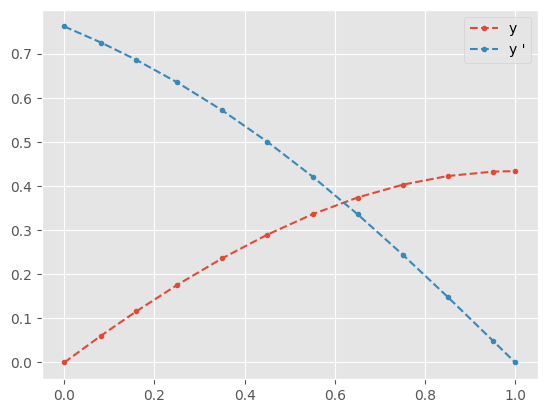

In [4]:
def functs(t,u):
    x,y=u
    vx=y
    vy=y**2 - 1
    return [vx,vy]

x0=[0, (e**2 - 1) / (e**2 + 1)]

t, sol = rkf( f=functs, a=0, b=1., x0=x0, atol=1e-8, rtol=1e-6 , hmax=1e-1, hmin=1e-40).solve()

dcvar={}
for i in range(len(x0)):
  var = "var_"+str(i)
  val = [val[i] for val in sol]
  dcvar[var] = val

import matplotlib.pyplot as plt
plt.close()
plt.style.use('ggplot')

# var_0 is the zeroth derivative i.e is the function itself
# var_1 is 1st derivative
for i in range(len(dcvar)):
  plt.plot(t, dcvar['var_'+str(i)] , marker='.', linestyle = 'dashed', label='y '+str("'")*i)

plt.legend()
plt.show()

**Example 3** <br/> Compare plot below for y with Answer: <img src="https://raw.githubusercontent.com/defencedog/jupyterNotebooks/main/No-Numpy-RKF-RungeKuttaFehlberg/2.jpg" width=400>

Execution time: 0.005263328552246094 seconds
Number of data points: 27


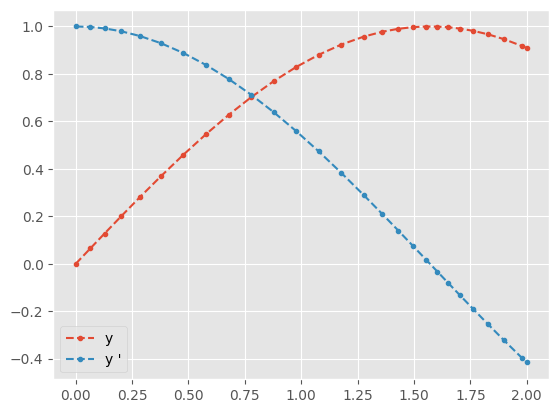

In [5]:
def functs(t,u):
    x,y=u
    vx=y
    vy=2*x**3 - 3*x + cos(t)*sin(2*t)
    return [vx,vy]

x0=[0, 1]

t, sol = rkf( f=functs, a=0, b=2., x0=x0, atol=1e-8, rtol=1e-6 , hmax=1e-1, hmin=1e-40).solve()

dcvar={}
for i in range(len(x0)):
  var = "var_"+str(i)
  val = [val[i] for val in sol]
  dcvar[var] = val

import matplotlib.pyplot as plt
plt.close()
plt.style.use('ggplot')

# var_0 is the zeroth derivative i.e is the function itself
# var_1 is 1st derivative
for i in range(len(dcvar)):
  plt.plot(t, dcvar['var_'+str(i)] , marker='.', linestyle = 'dashed', label='y '+str("'")*i)

plt.legend()
plt.show()

**Example 4** <br/> Compare plot below for y with Answer: <img src="https://raw.githubusercontent.com/defencedog/jupyterNotebooks/main/No-Numpy-RKF-RungeKuttaFehlberg/1.jpg" width=400>

Execution time: 0.003693819046020508 seconds
Number of data points: 30


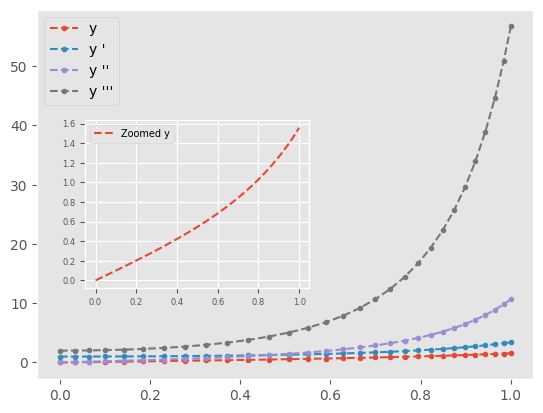

In [6]:
def functs(t,u):
    p,q,r,s=u
    vp=q
    vq=r
    vr=s
    vs=24*p**5 + 16*p + 40*(tan(t))**3
    return [vp, vq, vr, vs]

x0=[0, 1, 0, 2]

t, sol = rkf( f=functs, a=0, b=1., x0=x0, atol=1e-8, rtol=1e-6 , hmax=1e-1, hmin=1e-40).solve()

dcvar={}
for i in range(len(x0)):
  var = "var_"+str(i)
  val = [val[i] for val in sol]
  dcvar[var] = val

import matplotlib.pyplot as plt
plt.close()
plt.style.use('ggplot')

# var_0 is the zeroth derivative i.e is the function itself
# var_1 is 1st derivative
for i in range(len(dcvar)):
  plt.plot(t, dcvar['var_'+str(i)] , marker='.', linestyle = 'dashed', label='y '+str("'")*i)

plt.legend()
plt.grid()

sub_axes = plt.axes([0.2, 0.3, 0.35, 0.35]) 
sub_axes.plot(t, dcvar['var_0'], linestyle = 'dashed', label="Zoomed y")
sub_axes.legend(fontsize=7) 
plt.tick_params(labelsize=6)
plt.show()

In [7]:
%reload_ext version_information
%version_information 

Software versions
Python 3.9.13 64bit [Clang 12.0.9 (https://android.googlesource.com/toolchain/llvm-project c935d99d]
IPython 8.4.0
OS Linux 4.19.113 24856341 aarch64 with libc
Wed Nov 02 16:17:39 2022 PKT